# Audio Classification with Pipeline

In [1]:
from datasets import load_dataset, Audio

minds = load_dataset(path="PolyAI/minds14", name="en-AU", split="train")
minds = minds.cast_column("audio", Audio(sampling_rate=16_000))

print(minds)

Found cached dataset minds14 (/home/susnato/.cache/huggingface/datasets/PolyAI___minds14/en-AU/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696)


Dataset({
    features: ['path', 'audio', 'transcription', 'english_transcription', 'intent_class', 'lang_id'],
    num_rows: 654
})


In [2]:
from transformers import pipeline

pipe = pipeline(task="audio-classification",
                model="anton-l/xtreme_s_xlsr_300m_minds14")

2023-06-27 16:41:26.450430: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-27 16:41:26.450500: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-27 16:41:26.450505: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [3]:
example = minds[0]

In [4]:
print("Model Prediction - ")
print(pipe(example["audio"]))

print("Original Prediction - ")
print(minds.features["intent_class"].int2str(example["intent_class"]))

Model Prediction - 
[{'score': 0.9625311493873596, 'label': 'pay_bill'}, {'score': 0.028672724962234497, 'label': 'freeze'}, {'score': 0.003349794540554285, 'label': 'card_issues'}, {'score': 0.0020058020018041134, 'label': 'abroad'}, {'score': 0.0008484324789606035, 'label': 'high_value_payment'}]
Original Prediction - 
pay_bill


# Automatic Speech Reccognition

In [5]:
example = minds[0]

In [6]:
asr_en = pipeline("automatic-speech-recognition")
print(asr_en(example["audio"]["array"]))

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


{'text': 'I WOULD LIKE TO PAY MY ELECTRICITY BILL USING MY CAD CAN YOU PLEASE ASSIST'}


In [7]:
example["english_transcription"]

'I would like to pay my electricity bill using my card can you please assist'

In [8]:
minds_de = load_dataset(path="PolyAI/minds14", name="de-DE", split="train")
minds_de = minds_de.cast_column("audio", Audio(sampling_rate=16_000))
asr_de = pipeline(task="automatic-speech-recognition",
                  model="maxidl/wav2vec2-large-xlsr-german")

Found cached dataset minds14 (/home/susnato/.cache/huggingface/datasets/PolyAI___minds14/de-DE/1.0.0/65c7e0f3be79e18a6ffaf879a083daf706312d421ac90d25718459cbf3c42696)
/home/susnato/temp_files/transformers/src/transformers/configuration_utils.py:380: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [9]:
example = minds_de[0]
print(asr_de(example["audio"]["array"]))

{'text': 'ich möchte gerne geld auf mein konto einzallen'}


In [10]:
print(example["transcription"])

ich möchte gerne Geld auf mein Konto einzahlen


# Exerccise

In [11]:
from datasets import load_dataset

ds = load_dataset(path="facebook/voxpopuli",
                  name="en",
                  split="train",
                  streaming=True)

In [12]:
ds_examples = list(ds.take(3))

In [13]:
ds_examples[2]

{'audio_id': '20180314-0900-PLENARY-13-en_20180314-16:03:18_3',
 'language': 0,
 'audio': {'path': 'train_part_0/20180314-0900-PLENARY-13-en_20180314-16:03:18_3.wav',
  'array': array([ 0.00201416, -0.00344849, -0.00460815, ...,  0.00076294,
          0.00198364,  0.0012207 ]),
  'sampling_rate': 16000},
 'raw_text': 'In order to increase the preparedness at national and EU level, the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation, cooperation between Member States, economic cross border and cross sector collaboration,',
 'normalized_text': 'in order to increase the preparedness at national and eu level the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation cooperation between member states economic cross border and cross sector collaboration',
 'gender': 'female',
 'speaker_id': 'None',
 'is_gold_transcript': True,
 'accent': 'None'}

In [14]:
import IPython.display

IPython.display.Audio(ds_examples[2]["audio"]["array"],
                      rate=ds_examples[2]["audio"]["sampling_rate"])

## Waveform

In [15]:
array = ds_examples[2]["audio"]["array"]
sr = ds_examples[2]["audio"]["sampling_rate"]

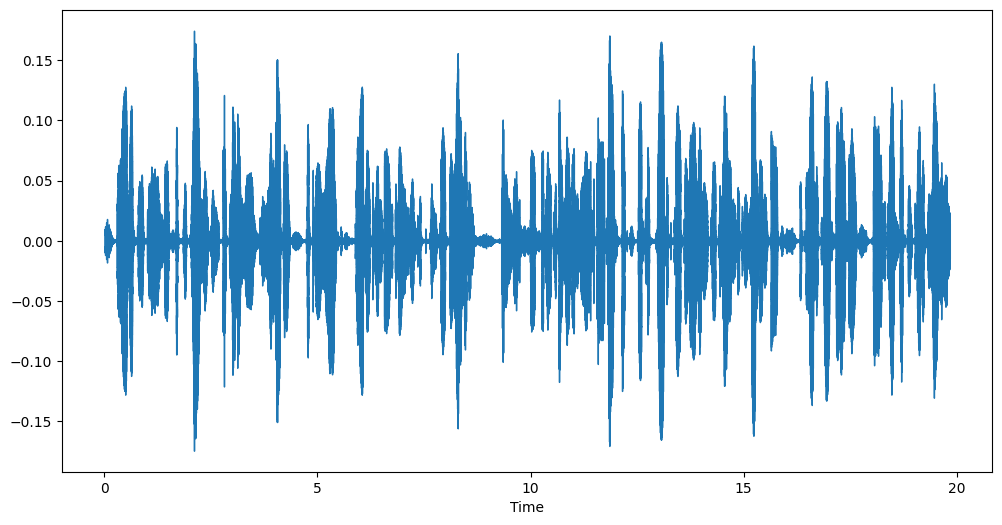

In [16]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.figure(figsize=(12, 6))
librosa.display.waveshow(array, sr=sr)
plt.show()


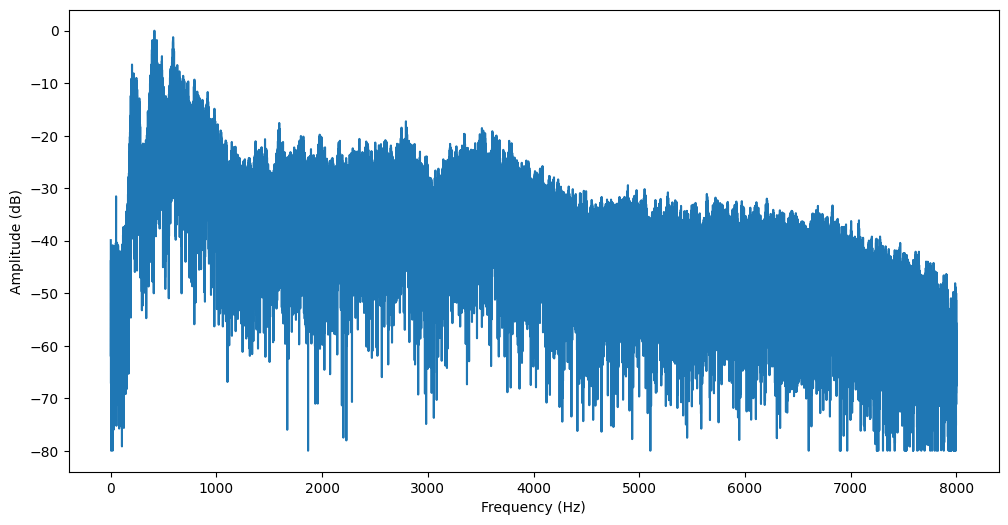

In [17]:
dft = np.fft.rfft(array * np.hanning(len(array)))

amp = np.abs(dft)
amp_db = librosa.amplitude_to_db(amp, ref=np.max)
freq = librosa.fft_frequencies(sr=sr, n_fft=len(array))

plt.figure(figsize=(12, 6))
plt.plot(freq, amp_db)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude (dB)")

plt.show()

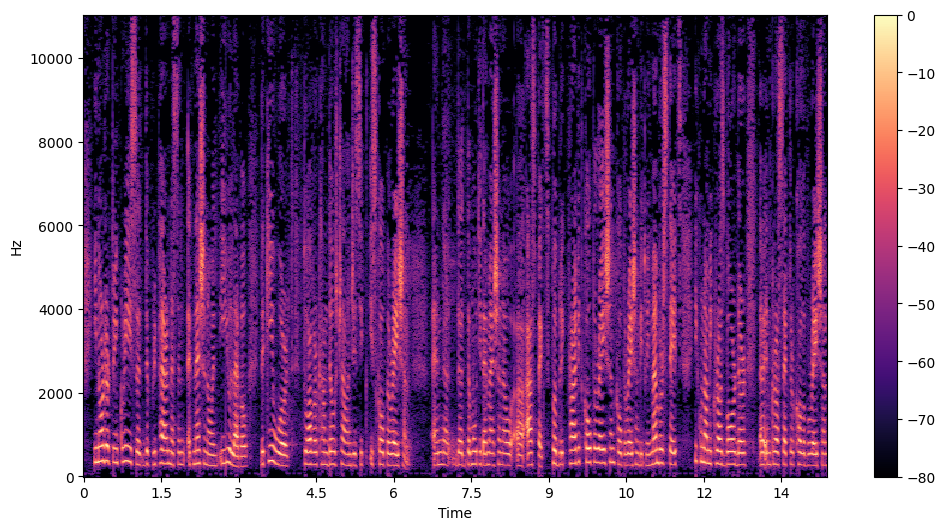

In [18]:
S = librosa.stft(array)
S = np.abs(S)
S = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(S, x_axis="time", y_axis="hz")
plt.colorbar()
plt.show()

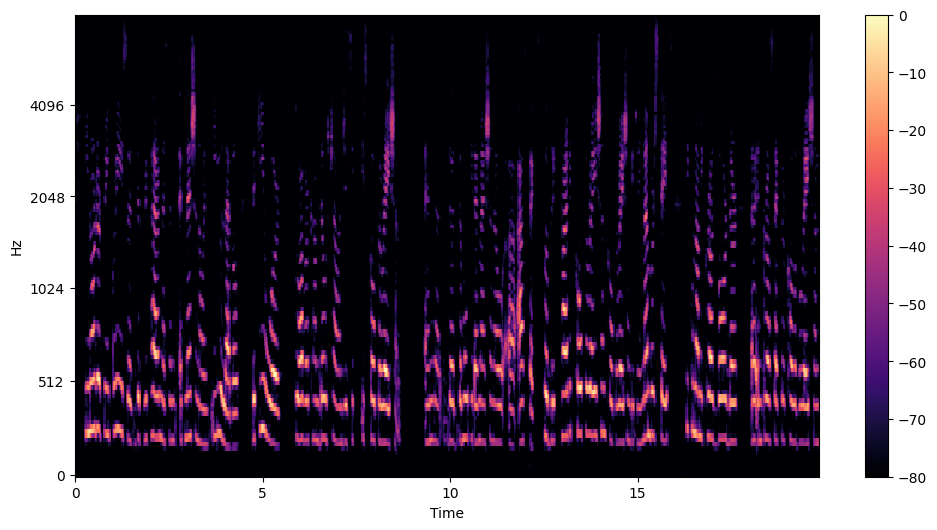

In [19]:
S_mel = librosa.feature.melspectrogram(y=array, sr=sr, n_mels=128, fmax=sr//2)
S_log_mel = librosa.amplitude_to_db(S_mel, ref=np.max)

plt.figure(figsize=(12, 6))
librosa.display.specshow(S_log_mel, x_axis="time", y_axis="mel", sr=sr, fmax=sr//2)
plt.colorbar()
plt.show()

In [20]:
from transformers import pipeline

pipe_asr_en = pipeline(task="automatic-speech-recognition")

print(f"Real Transcription - \n {ds_examples[2]['raw_text']}")
print(f"Model Generated Transcription - \n {pipe_asr_en(array)}")

No model was supplied, defaulted to facebook/wav2vec2-base-960h and revision 55bb623 (https://huggingface.co/facebook/wav2vec2-base-960h).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.masked_spec_embed']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Real Transcription - 
 In order to increase the preparedness at national and EU level, the key word to overcome those challenges is cooperation and the multidimensional aspects public private cooperation, cooperation between Member States, economic cross border and cross sector collaboration,
Model Generated Transcription - 
 {'text': 'IN ORDER TO INCREASE THE PREPARENESSEN ATNATIONAL AND EVIL LEVEL THE KEY WORD TO OVERCOME THOSE CHALLENGES IC ISCOPERATION AND  THETHE MOOTI DIMENSION OF A ASPECTS PUBLIC PRIVATE COPERATION COPERATION BETWEEN MEMBER STATES ECONOMI CROSS BORDER INCROSSECTOR COLOPERATION'}


Conclusion : The model generated transcription is NOT good!